<a href="https://colab.research.google.com/github/gopal2812/convandgpt/blob/main/Submission7/Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/convandgpt/
!git clone https://github.com/gopal2812/convandgpt.git
import os

Cloning into 'convandgpt'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 70 (delta 30), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (70/70), 233.99 KiB | 2.89 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [2]:
os.chdir("/content/convandgpt/Submission7")

In [3]:
!pwd;ls

/content/convandgpt/Submission7
Model1.ipynb  Model2.ipynb  model.py  utils.py


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from utils import train, test
import torch.nn.functional as F
from model import Model_3

!pip install torchsummary
from torchsummary import summary


In [5]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
model = Model_3().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             910
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 11, 22, 22]           1,001
              ReLU-8           [-1, 11, 22, 22]               0
       BatchNorm2d-9           [-1, 11, 22, 22]              22
           Conv2d-10           [-1, 10, 11, 11]             120
             ReLU-11           [-1, 10, 11, 11]               0
           Conv2d-12             [-1, 10, 9, 9]             910
             ReLU-13             [-1, 10, 9, 9]               0
      BatchNorm2d-14             [-1, 1

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
batch_size = 64
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.05),
    #transforms.RandomResizedCrop(size=(27, 27)),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-12., 12.), fill=0),
    transforms.RandomAffine(degrees=5, shear=5, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 99684733.68it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 89004918.31it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30957298.30it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1962555.76it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



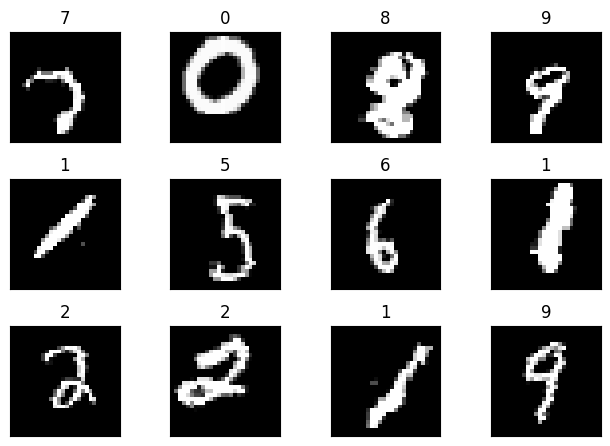

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [9]:
# New Line
num_epochs = 15
l1_factor=0
l2_factor=0
epochs = 15
from torch.optim.lr_scheduler import StepLR,OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.025, momentum=0.97,weight_decay=l2_factor)
scheduler = OneCycleLR(optimizer, max_lr=0.025,epochs=epochs,steps_per_epoch=len(train_loader))

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train(model, device, train_loader, optimizer, epoch, train_accuracy, train_losses, l1_factor,scheduler)
    test(model, device, test_loader,test_accuracy,test_losses)


Epoch 1:


Loss=0.30282264947891235 Batch_id=937 Accuracy=65.46: 100%|██████████| 938/938 [01:10<00:00, 13.25it/s]



Test set: Average loss: 0.1712, Accuracy: 9508/10000 (95.08%)

Epoch 2:


Loss=0.1582934409379959 Batch_id=937 Accuracy=92.80: 100%|██████████| 938/938 [01:04<00:00, 14.58it/s]



Test set: Average loss: 0.0621, Accuracy: 9823/10000 (98.23%)

Epoch 3:


Loss=0.10802730917930603 Batch_id=937 Accuracy=95.00: 100%|██████████| 938/938 [01:00<00:00, 15.62it/s]



Test set: Average loss: 0.0558, Accuracy: 9819/10000 (98.19%)

Epoch 4:


Loss=0.05237516760826111 Batch_id=937 Accuracy=95.86: 100%|██████████| 938/938 [01:00<00:00, 15.58it/s]



Test set: Average loss: 0.0309, Accuracy: 9894/10000 (98.94%)

Epoch 5:


Loss=0.057622719556093216 Batch_id=937 Accuracy=96.37: 100%|██████████| 938/938 [01:00<00:00, 15.47it/s]



Test set: Average loss: 0.0384, Accuracy: 9881/10000 (98.81%)

Epoch 6:


Loss=0.036681436002254486 Batch_id=937 Accuracy=96.68: 100%|██████████| 938/938 [01:00<00:00, 15.61it/s]



Test set: Average loss: 0.0299, Accuracy: 9899/10000 (98.99%)

Epoch 7:


Loss=0.18803483247756958 Batch_id=937 Accuracy=96.95: 100%|██████████| 938/938 [01:00<00:00, 15.50it/s]



Test set: Average loss: 0.0280, Accuracy: 9906/10000 (99.06%)

Epoch 8:


Loss=0.060343995690345764 Batch_id=937 Accuracy=97.11: 100%|██████████| 938/938 [01:00<00:00, 15.50it/s]



Test set: Average loss: 0.0265, Accuracy: 9916/10000 (99.16%)

Epoch 9:


Loss=0.055150359869003296 Batch_id=937 Accuracy=97.18: 100%|██████████| 938/938 [01:00<00:00, 15.52it/s]



Test set: Average loss: 0.0244, Accuracy: 9922/10000 (99.22%)

Epoch 10:


Loss=0.039352916181087494 Batch_id=937 Accuracy=97.41: 100%|██████████| 938/938 [00:59<00:00, 15.65it/s]



Test set: Average loss: 0.0236, Accuracy: 9925/10000 (99.25%)

Epoch 11:


Loss=0.011868859641253948 Batch_id=937 Accuracy=97.66: 100%|██████████| 938/938 [01:00<00:00, 15.55it/s]



Test set: Average loss: 0.0238, Accuracy: 9915/10000 (99.15%)

Epoch 12:


Loss=0.004151580855250359 Batch_id=937 Accuracy=97.78: 100%|██████████| 938/938 [01:00<00:00, 15.39it/s]



Test set: Average loss: 0.0183, Accuracy: 9942/10000 (99.42%)

Epoch 13:


Loss=0.011535853147506714 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [01:00<00:00, 15.62it/s]



Test set: Average loss: 0.0177, Accuracy: 9946/10000 (99.46%)

Epoch 14:


Loss=0.025141669437289238 Batch_id=937 Accuracy=97.90: 100%|██████████| 938/938 [01:00<00:00, 15.58it/s]



Test set: Average loss: 0.0169, Accuracy: 9946/10000 (99.46%)

Epoch 15:


Loss=0.02125420793890953 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [01:05<00:00, 14.24it/s]



Test set: Average loss: 0.0167, Accuracy: 9942/10000 (99.42%)



## Model 3

#Target

Trim down to the least expensive model in terms of parameters while meeting the target consistently.Have network parameter less than 6K


#Results

Train Acc: 98.08

Test Acc: 99.46

Parameters: 5196

#Analysis
Layer Norm working much better
Cyclic LR is giving better result
We have successfully trimmed to a very light model achieving 99.46% consistnently while training for just 15 epochs!
